<a href="https://colab.research.google.com/github/athiralprakash/Data-Analytics-Project/blob/main/course9_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-11-22 20:28:34--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.5’

m4_survey_data.sqli 100%[===================>]  34.98M  33.1MB/s    in 1.1s    

2023-11-22 20:28:36 (33.1 MB/s) - ‘m4_survey_data.sqlite.5’ saved [36679680/36679680]



Connect to the database.


In [ ]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [ ]:
import pandas as pd

## Demo: How to run an sql query


In [ ]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


**In The list of most popular languages respondents wish to learn next year, what is the rank of Python?**

In [ ]:
# Query to get the top languages respondents wish to learn next year
query_top_languages = """
SELECT LanguageDesireNextYear, COUNT(*) as Count
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY Count DESC
"""

# Execute the query and read the results into a DataFrame
top_languages_df = pd.read_sql_query(query_top_languages, conn)

# Display the DataFrame to see the top languages and their counts
print(top_languages_df)

# Find the rank of Python
python_rank = top_languages_df[top_languages_df['LanguageDesireNextYear'] == 'Python'].index[0] + 1

# Display the rank of Python
print(f"The rank of Python among the most popular languages respondents wish to learn next year is: {python_rank}")


   LanguageDesireNextYear  Count
0              JavaScript   6630
1                HTML/CSS   5328
2                  Python   5239
3                     SQL   5012
4              TypeScript   4088
5                      C#   3591
6   Bash/Shell/PowerShell   3097
7                    Java   2953
8                      Go   2759
9                  Kotlin   1890
10                    C++   1633
11                   Rust   1520
12                    PHP   1457
13            WebAssembly   1397
14                  Swift   1179
15                   Ruby   1029
16                      C   1028
17                  Scala    879
18                      R    850
19              Other(s):    836
20                     F#    621
21                 Elixir    620
22                   Dart    610
23                Clojure    413
24               Assembly    336
25            Objective-C    310
26                 Erlang    310
27                    VBA    149
The rank of Python among the most popular l

**how many respondents indicated that they currently work with 'SQL'**

In [ ]:
# Query to count the number of respondents who currently work with 'SQL'
query_sql_count = """
SELECT COUNT(*) as SQL_Count
FROM LanguageWorkedWith
WHERE LanguageWorkedWith = 'SQL'
"""

# Execute the query and read the result into a DataFrame
sql_count_df = pd.read_sql_query(query_sql_count, conn)

# Display the count
print(f"Number of respondents who currently work with 'SQL': {sql_count_df['SQL_Count'].values[0]}")


Number of respondents who currently work with 'SQL': 7106


In [ ]:
# Query to count the number of respondents who currently work with 'SQL'
query_mysql_count = """
SELECT COUNT(*) as MySQL_Count
FROM PlatformWorkedWith
WHERE PlatformWorkedWith = 'MySQL'
"""

# Execute the query and read the result into a DataFrame
mysql_count_df = pd.read_sql_query(query_mysql_count, conn)

# Display the count
print(f"Number of respondents who currently work with 'MySQL': {mysql_count_df['MySQL_Count'].values[0]}")

Number of respondents who currently work with 'MySQL': 0


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

In [ ]:
table_name = 'DatabaseDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df_databaseDesireNextYear = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

In [ ]:
pip install pandas matplotlib as plt

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


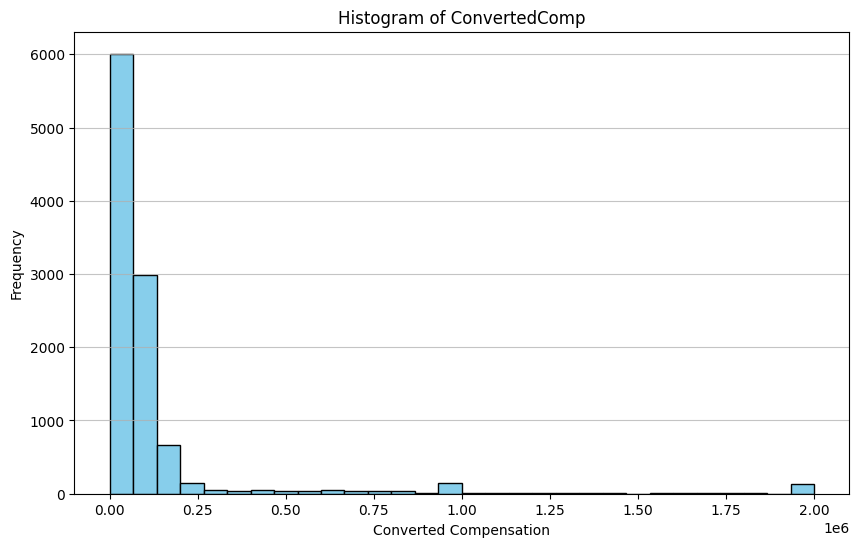

In [ ]:


# Read data from the database into a DataFrame
query = "SELECT ConvertedComp FROM master"
df = pd.read_sql_query(query, conn)

# Plot a histogram of ConvertedComp
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

### Box Plots


Plot a box plot of `Age.`


In [ ]:
import seaborn as sns

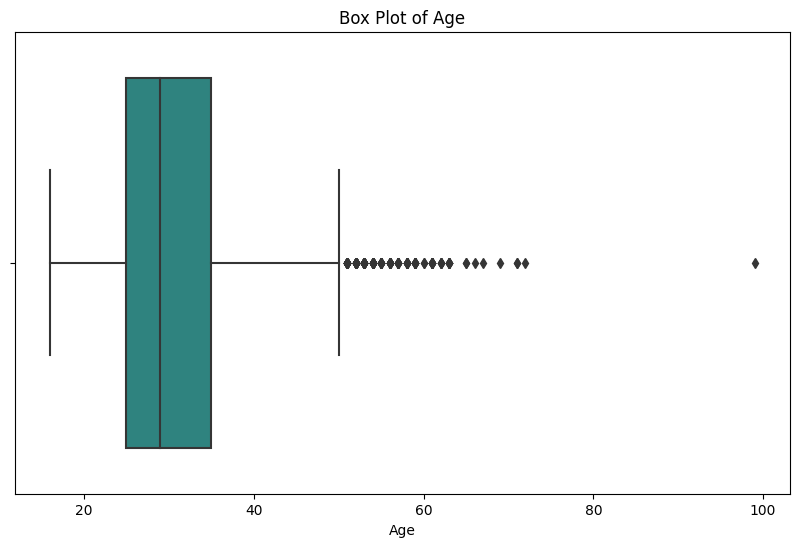

In [ ]:
# your code goes here

# Read data from the database into a DataFrame
query = "SELECT Age, ConvertedComp FROM master"
df = pd.read_sql_query(query, conn)

# Plot a box plot of Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', data=df, palette='viridis')

# Set labels and title
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


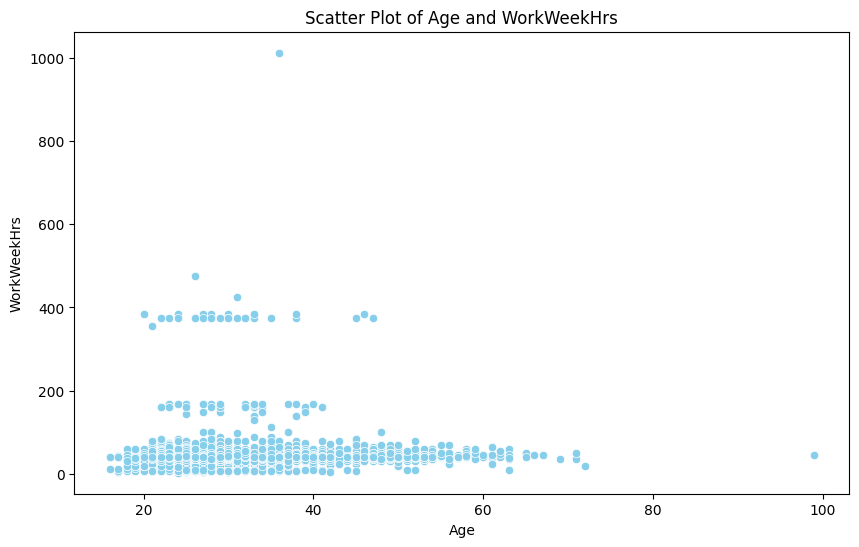

In [ ]:
# your code goes here
# Read data from the database into a DataFrame
query = "SELECT Age, WorkWeekHrs FROM master"
df = pd.read_sql_query(query, conn)

# Plot a scatter plot of Age and WorkWeekHrs
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='WorkWeekHrs', data=df, color='skyblue')

# Set labels and title
plt.title('Scatter Plot of Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.show()


In [ ]:
# Calculate the correlation coefficient between Age and WorkWeekHrs
correlation_coefficient = df['Age'].corr(df['WorkWeekHrs'])

print(f"The correlation coefficient between Age and WorkWeekHrs is: {correlation_coefficient}")

The correlation coefficient between Age and WorkWeekHrs is: 0.03651747018287783


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


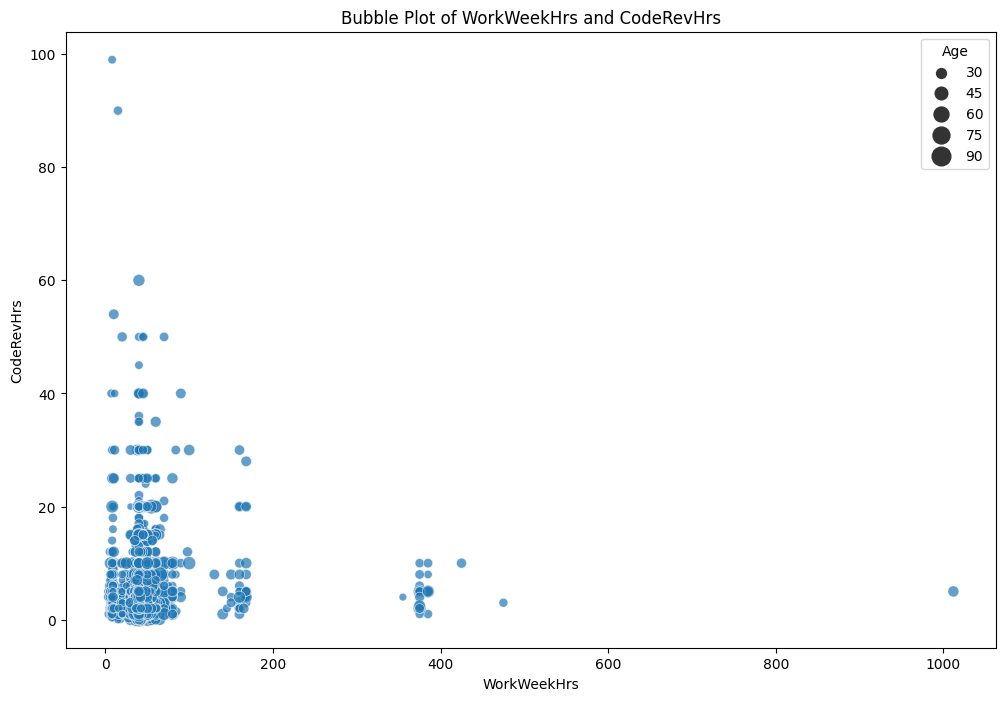

In [ ]:
# your code goes here

# Read data from the database into a DataFrame
query = "SELECT Age, WorkWeekHrs, CodeRevHrs FROM master"
df_bubble_plot = pd.read_sql_query(query, conn)

# Plot a bubble plot of WorkWeekHrs and CodeRevHrs with Age as bubble size
plt.figure(figsize=(12, 8))
sns.scatterplot(x='WorkWeekHrs', y='CodeRevHrs', size='Age', data=df_bubble_plot, sizes=(20, 200), alpha=0.7)

# Set labels and title
plt.title('Bubble Plot of WorkWeekHrs and CodeRevHrs')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.show()

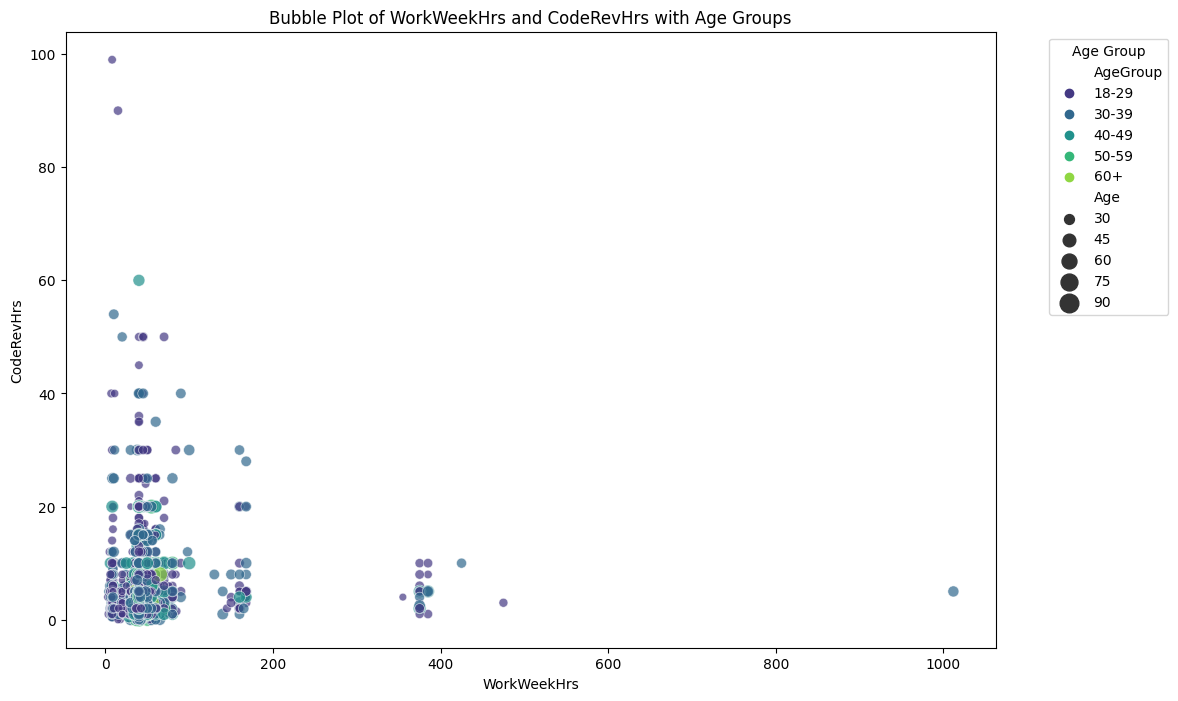

In [ ]:
#Bubble graph with hue
# Create age groups (you can customize the age groups as needed)
bins = [18, 30, 40, 50, 60, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Plot a bubble plot with color variation based on age groups
plt.figure(figsize=(12, 8))
sns.scatterplot(x='WorkWeekHrs', y='CodeRevHrs', size='Age', hue='AgeGroup', palette='viridis', data=df, sizes=(20, 200), alpha=0.7)

# Set labels and title
plt.title('Bubble Plot of WorkWeekHrs and CodeRevHrs with Age Groups')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')  # Add legend

plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


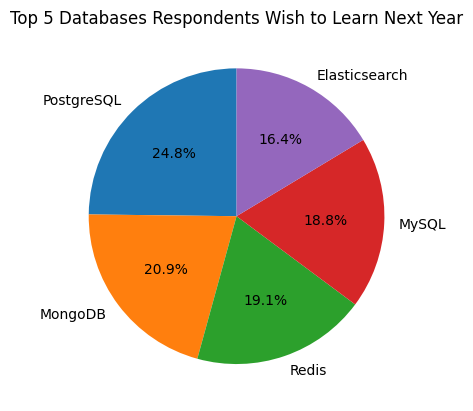

In [ ]:
table_name = 'DatabaseDesireNextYear'

# Query to get the top 5 databases that respondents wish to learn next year
query_top_databases = f"""
SELECT DatabaseDesireNextYear, COUNT(*) as Count
FROM {table_name}
GROUP BY DatabaseDesireNextYear
ORDER BY Count DESC
LIMIT 5
"""

# Execute the query and read the results into a DataFrame
top_databases_df = pd.read_sql_query(query_top_databases, conn)

# Plot pie chart
plt.pie(top_databases_df['Count'], labels=top_databases_df['DatabaseDesireNextYear'], autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.show()


In [ ]:
q = """
SELECT * FROM DatabaseDesireNextYear"""
df_databaseDesireNextYear = pd.read_sql_query(q,conn)

df_databaseDesireNextYear

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite
...,...,...
29570,25141,Elasticsearch
29571,25141,MongoDB
29572,25141,Microsoft SQL Server
29573,25141,Redis


In [ ]:
# Query to count the number of respondents who currently work with 'SQL'
query_sql_count = f"""
SELECT COUNT(*) as SQL_Count
FROM {table_name}
WHERE DatabaseDesireNextYear = 'SQL'
"""

# Execute the query and read the result into a DataFrame
sql_count_df = pd.read_sql_query(query_sql_count, conn)

# Display the count
print(f"Number of respondents who currently work with 'SQL': {sql_count_df['SQL_Count'].values[0]}")

Number of respondents who currently work with 'SQL': 0


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<Figure size 1000x600 with 0 Axes>

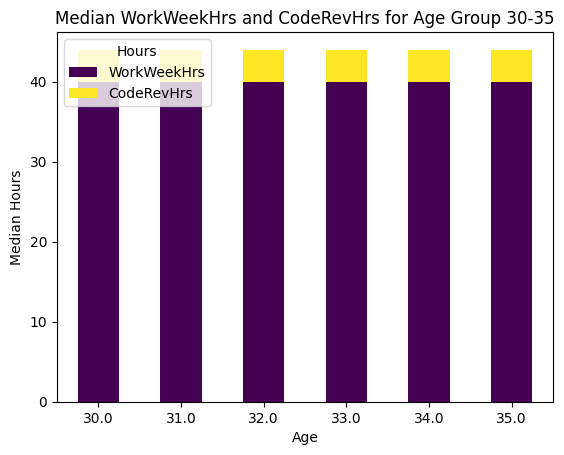

In [ ]:
# Define the age group (30 to 35)
age_group = (df['Age'] >= 30) & (df['Age'] <= 35)

# Calculate median values for WorkWeekHrs and CodeRevHrs for the specified age group
median_values = df[age_group].groupby('Age')[['WorkWeekHrs', 'CodeRevHrs']].median()

# Plot a stacked bar chart
plt.figure(figsize=(10, 6))
median_values.plot(kind='bar', stacked=True, colormap='viridis')

# Set labels and title
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30-35')
plt.xlabel('Age')
plt.ylabel('Median Hours')
plt.xticks(rotation=0)

# Display the legend
plt.legend(title='Hours', loc='upper left')

plt.show()

In [ ]:
df.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


## Visualizing comparison of data


### Line Chart


In [ ]:
QUERY1 = """
SELECT *
FROM master
"""
df = pd.read_sql_query(QUERY1,conn)

In [ ]:
df.head()

,index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,...,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,...,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...",Neutral,Somewhat more welcome now than last year,28.0,No,Yes,Appropriate in length,Easy
3,3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",...,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,26.0,No,No,Appropriate in length,Neither easy nor difficult
4,4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",...,A few times per week,"No, I didn't know that Stack Overflow had a jo...","No, I've heard of them, but I am not part of a...","Yes, somewhat",Just as welcome now as I felt last year,29.0,No,No,Appropriate in length,Easy


In [ ]:
df.columns


Index(['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase'],
      dtype='object')

**Majority of the survey responders are**

In [ ]:
# Get the counts of each category in the 'MainBranch' column
main_branch_counts = df['MainBranch'].value_counts()

# Find the category with the highest count (majority)
majority_category = main_branch_counts.idxmax()

# Display the majority category
print(f"Majority of the survey responders are: {majority_category}")


Majority of the survey responders are: I am a developer by profession


Plot the median `ConvertedComp` for all ages from 45 to 60.


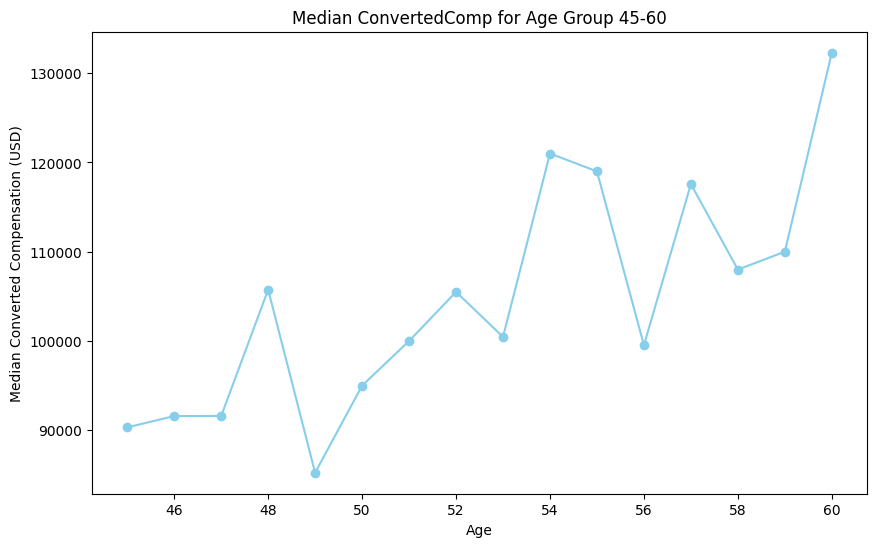

In [ ]:
# your code goes here
# Define the age range (45 to 60)
age_range = (df['Age'] >= 45) & (df['Age'] <= 60)

# Calculate median 'ConvertedComp' values for the specified age range
median_values = df[age_range].groupby('Age')['ConvertedComp'].median()

# Plot a line chart
plt.figure(figsize=(10, 6))
median_values.plot(marker='o', linestyle='-', color='skyblue')

# Set labels and title
plt.title('Median ConvertedComp for Age Group 45-60')
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation (USD)')

plt.show()


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


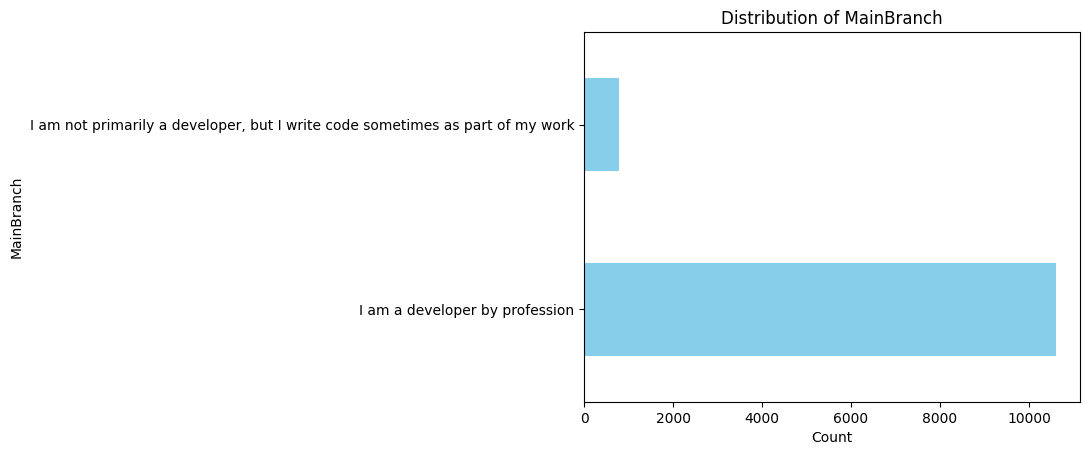

In [ ]:
# your code goes here

branch_counts = df['MainBranch'].value_counts()

# Plot horizontal bar chart
branch_counts.plot(kind='barh', color='skyblue')
plt.title('Distribution of MainBranch')
plt.xlabel('Count')
plt.ylabel('MainBranch')
plt.show()

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
